In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, balanced_accuracy_score



In [2]:
df = pd.read_csv('../../2-cleaning-EDA/data/pros.csv')

In [3]:
df.shape

(958, 48)

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
X = df.drop(columns = 'player_name')
y = df.player_name

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [6]:
y_train.value_counts(normalize = True)

Vati           0.398329
Oski           0.337047
M0nkey M00n    0.264624
Name: player_name, dtype: float64

In [66]:
ss = StandardScaler()

# X_train = pd.DataFrame(ss.fit_transform(X_train), columns = ss.get_feature_names_out())
# X_test = pd.DataFrame(ss.transform(X_test), columns = ss.get_feature_names_out())


In [8]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
knn.score(X_train, y_train)

0.766016713091922

In [10]:
knn.score(X_test, y_test)

0.6833333333333333

In [11]:
et = ExtraTreesClassifier()

et.fit(X_train, y_train)


ExtraTreesClassifier()

In [12]:
et.score(X_train, y_train)

1.0

In [13]:
et.score(X_test, y_test)

0.8916666666666667

In [14]:
poly = PolynomialFeatures(interaction_only=True)

X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out())
X_test_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out())

In [15]:
X_train_poly.shape

(718, 1082)

In [16]:
knn.fit(X_train_poly, y_train)

KNeighborsClassifier()

In [17]:
knn.score(X_train_poly, y_train)

0.7381615598885793

In [18]:
knn.score(X_test_poly, y_test)

0.6666666666666666

In [19]:
et.fit(X_train_poly, y_train)

ExtraTreesClassifier()

In [20]:
et.score(X_train_poly, y_train)

1.0

In [21]:
et.score(X_test_poly, y_test)

0.9

In [157]:
def get_accuracies(X_train, y_train, X_test, y_test, model, model_name:str, scores_df=None, norm=None, confusion = True):
    
    # Takes training and test splits, a desired model and model name (string),
    # current scoring dataframe and norm parameter for the heatmap output
    
    # Creates columns for scoring metrics on first run
    if scores_df is None:
        scores_df = pd.DataFrame(columns = ['train_acc', 'test_acc', 'bal_acc'])
    
    # fits model to training data
    model.fit(X_train, y_train)
    
    # produces a confusion matrix for the prediction and true values of the test data
    if confusion == True:
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', normalize=norm)
    
    # predicted subreddits for each row, used to calculate balanced accuracy
    preds = model.predict(X_test)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    bal_acc = balanced_accuracy_score(y_test, preds)

    # dataframe updated with model name and corresponding scores
    scores_df.loc[model_name,:] = [train_acc, test_acc, bal_acc]
    
    print(scores_df)
    
    return scores_df

In [23]:
pipe_knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [24]:
gs_knn = GridSearchCV(
    pipe_knn,
    param_grid={
        'knn__n_neighbors' : [3, 5, 7, 9, 10, 11, 15],
        'knn__weights' : ['uniform', 'distance'],
        'knn__p' : [0.5 ,1, 1.5, 2]
    },
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    scoring='balanced_accuracy'
)

In [25]:
gs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sk

    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 481, in predict
    return self.steps[-1][1].predict(Xt, **predict_params)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 824, in kneighbors
    results = ArgKmin.compute(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py", line 277, in compute
    return ArgKmin64.compute(
  File "sklearn/metrics/_pairwise_distances_reduction/_argkmin.pyx", line 87, in sklearn.metrics._pairwise_distances_reduc

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/pyth

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/pyth

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/pyth

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/pyth

    return self.steps[-1][1].predict(Xt, **predict_params)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 237, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 824, in kneighbors
    results = ArgKmin.compute(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_pairwise_distances_reduction/_dispatcher.py", line 277, in compute
    return ArgKmin64.compute(
  File "sklearn/metrics/_pairwise_distances_reduction/_argkmin.pyx", line 87, in sklearn.metrics._pairwise_distances_reduction._argkmin.ArgKmin64.compute
  File "sklearn/metrics/_pairwise_distances_reduction/_datasets_pair.pyx", line 87, in sklearn.metrics._pairwise_distances_reduction._datasets_pair.DatasetsPair64.get_for
  File "sklearn/metrics/_dist_metrics.pyx", line 285, in sklearn.metrics._dist_metrics.DistanceMetric.get_metric
  File "skle

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/pyth

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py:634: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bede/opt/anaconda3/lib/pyth

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.81476269 0.8507812  0.81714595 0.86053177
 0.80519417 0.85504931        nan        nan 0.81920601 0.86185265
 0.82958613 0.87548947 0.81125834 0.86667279        nan        nan
 0.82650397 0.86375324 0.82403875 0.86283947 0.81932386 0.8567111
        nan        nan 0.83879727 0.87744742 0.83471569 0.87442951
 0.82202036 0.85972834        nan        nan 0.8469397  0.8800059
 0.83141804 0.87628158 0.82812038 0.8685047         nan        nan
 0.83807826 0.87925031 0.83595462 0.87707749 0.82350313 0.86518688
        nan        nan 0.83658351 0.88495207 0.83678264 0.8889196
 0.81090545 0.86130443]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 10, 11, 15],
                         'knn__p': [0.5, 1, 1.5, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=1)

In [26]:
gs_knn.best_params_

{'knn__n_neighbors': 15, 'knn__p': 1.5, 'knn__weights': 'distance'}

    train_acc  test_acc   bal_acc
knn       1.0  0.870833  0.869029


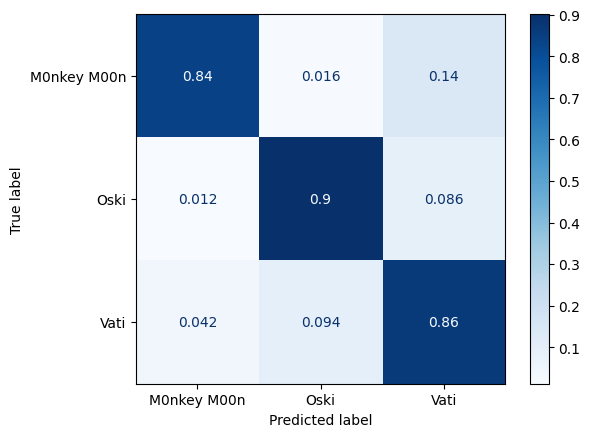

In [27]:
scores_df = get_accuracies(X_train, y_train, X_test, y_test, 
                           gs_knn.best_estimator_, 
                           'knn',
                           norm = 'true')

In [28]:
pipe_et = Pipeline([
    ('ss', StandardScaler()),
    ('et', ExtraTreesClassifier())
])

In [29]:
gs_et = GridSearchCV(
    pipe_et,
    param_grid={
        'et__n_estimators' : [46],
        'et__max_depth' : [5,7,10,15],
        'et__min_samples_split' : [1,2,3,4]
    },
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    scoring = 'balanced_accuracy'
)

In [30]:
gs_et.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._valid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('et', ExtraTreesClassifier())]),
             n_jobs=-1,
             param_grid={'et__max_depth': [5, 7, 10, 15],
                         'et__min_samples_split': [1, 2, 3, 4],
                         'et__n_estimators': [46]},
             scoring='balanced_accuracy', verbose=1)

In [31]:
gs_et.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('et', ExtraTreesClassifier(max_depth=10, n_estimators=46))])

    train_acc  test_acc   bal_acc
knn       1.0  0.870833  0.869029
et        1.0    0.9125  0.911027


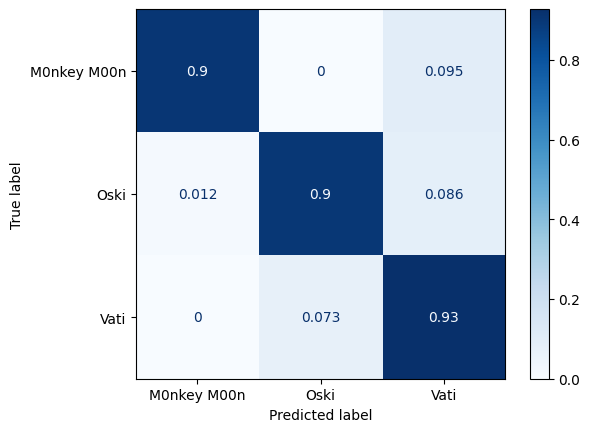

In [32]:
scores_df = get_accuracies(X_train, y_train, X_test, y_test, 
                           gs_et.best_estimator_, 
                           'et',
                           scores_df = scores_df,
                           norm = 'true')

In [33]:
importances = gs_et.best_estimator_.named_steps['et'].feature_importances_

In [34]:
features = []
for i in range(46):
    features.append((importances[i],df.columns[i]))

In [35]:
features.sort()

In [36]:
features = features[::-1]

In [37]:
feature_importances = pd.DataFrame(features, columns = ['prediction weight', 'stat'])

In [38]:
feature_importances

,prediction weight,stat
0,0.052420,percent_supersonic_speed
1,0.050669,percent_low_air
2,0.047748,bcpm
3,0.047568,avg_speed_percentage
4,0.043689,percent_boost_75_100
5,0.043432,count_powerslide
6,0.043065,percent_slow_speed
7,0.042752,percent_full_boost
8,0.040419,percent_farthest_from_ball
9,0.037273,percent_ground


In [39]:
probabilities = pd.DataFrame(gs_et.best_estimator_.predict_proba(X_test), columns = ['MonkeyMoon', 'Oski', 'Vatira'])

In [40]:
probabilities

,MonkeyMoon,Oski,Vatira
0,0.018912,0.902972,0.078116
1,0.240909,0.119975,0.639116
2,0.841178,0.044658,0.114164
3,0.694239,0.125261,0.180501
4,0.522335,0.131602,0.346062
...,...,...,...
235,0.801327,0.069581,0.129092
236,0.847363,0.023000,0.129636
237,0.121875,0.248680,0.629445
238,0.070484,0.720795,0.208721


In [41]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [42]:
mnb.score(X_train, y_train)

0.6030640668523677

In [43]:
mnb.score(X_test, y_test)

0.6291666666666667

In [44]:
pipe_gnb = Pipeline([
    ('ss', StandardScaler()),
    ('gnb', GaussianNB())
])

In [45]:
gs_gnb = GridSearchCV(
    pipe_gnb,
    param_grid = {
    },
    cv = 5,
    verbose = 1,
    n_jobs = -1,
    scoring = 'balanced_accuracy'
)

In [46]:
gs_gnb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('gnb', GaussianNB())]),
             n_jobs=-1, param_grid={}, scoring='balanced_accuracy', verbose=1)

    train_acc  test_acc   bal_acc
knn       1.0  0.870833  0.869029
et        1.0    0.9125  0.911027
gnb  0.774373     0.725  0.741825


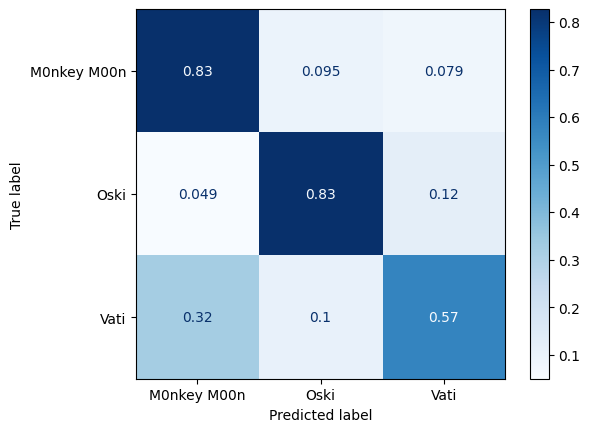

In [48]:
scores_df = get_accuracies(X_train, y_train, X_test, y_test, 
                           gs_gnb.best_estimator_, 
                           'gnb',
                           scores_df = scores_df,
                           norm = 'true')

In [53]:
stack = [
#     ('gnb', gs_gnb.best_estimator_),
    ('knn', gs_knn.best_estimator_)
]

In [54]:
stx = StackingClassifier(
    estimators=stack,
    final_estimator=gs_et.best_estimator_
)

In [55]:
stx.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                Pipeline(steps=[('ss', StandardScaler()),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=15,
                                                                      p=1.5,
                                                                      weights='distance'))]))],
                   final_estimator=Pipeline(steps=[('ss', StandardScaler()),
                                                   ('et',
                                                    ExtraTreesClassifier(max_depth=10,
                                                                         n_estimators=46))]))

      train_acc  test_acc   bal_acc
knn         1.0  0.870833  0.869029
et          1.0    0.9125  0.911027
gnb    0.774373     0.725  0.741825
stack       1.0  0.870833  0.870848


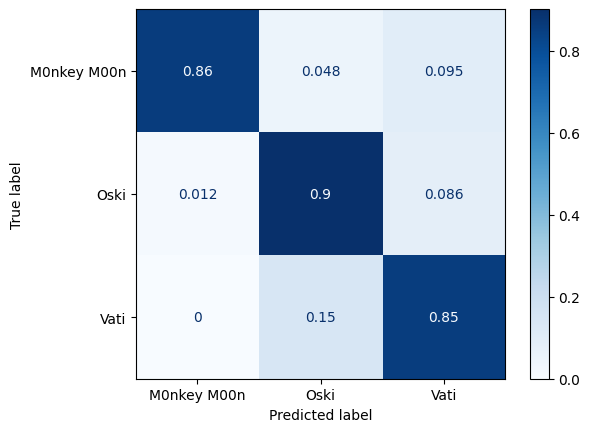

In [56]:
scores_df = get_accuracies(X_train, y_train, X_test, y_test, 
                           stx, 
                           'stack',
                           scores_df = scores_df,
                           norm = 'true')

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
nn_y = y.replace({
    'M0nkey M00n' : 0,
    'Oski' : 1,
    'Vati' : 2
})

In [62]:
nn_y.value_counts()

2    382
1    323
0    253
Name: player_name, dtype: int64

In [63]:
nn_y = to_categorical(nn_y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, nn_y, random_state=42, stratify=y)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [145]:
model = Sequential()

model.add(Dense(32,
                input_shape = (46,),
                activation = 'relu'
               )
         )

model.add(Dense(16,
                activation='relu'
               )
         )

model.add(Dense(3,
                activation = 'softmax'
               )
         )

In [146]:
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

In [147]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience = 5,
                           min_delta = 0.01,
                           restore_best_weights=True
                          )

In [148]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 100, 
          batch_size = 512,
          callbacks = [early_stop]
                   )

Epoch 1/100
2/2 [==============================] - 1s 269ms/step - loss: 1.2549 - acc: 0.3663 - val_loss: 1.2164 - val_acc: 0.3708
Epoch 2/100
2/2 [==============================] - 0s 74ms/step - loss: 1.2032 - acc: 0.3886 - val_loss: 1.1668 - val_acc: 0.3833
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 1.1585 - acc: 0.4053 - val_loss: 1.1219 - val_acc: 0.3958
Epoch 4/100
2/2 [==============================] - 0s 69ms/step - loss: 1.1176 - acc: 0.4136 - val_loss: 1.0823 - val_acc: 0.4167
Epoch 5/100
2/2 [==============================] - 0s 49ms/step - loss: 1.0818 - acc: 0.4387 - val_loss: 1.0468 - val_acc: 0.4458
Epoch 6/100
2/2 [==============================] - 0s 62ms/step - loss: 1.0487 - acc: 0.4540 - val_loss: 1.0147 - val_acc: 0.4750
Epoch 7/100
2/2 [==============================] - 0s 68ms/step - loss: 1.0193 - acc: 0.4749 - val_loss: 0.9854 - val_acc: 0.5083
Epoch 8/100
2/2 [==============================] - 0s 60ms/step - loss: 0.9918 - acc: 0.4

2/2 [==============================] - 0s 49ms/step - loss: 0.3340 - acc: 0.9123 - val_loss: 0.4496 - val_acc: 0.8833
Epoch 64/100
2/2 [==============================] - 0s 58ms/step - loss: 0.3274 - acc: 0.9150 - val_loss: 0.4463 - val_acc: 0.8875
Epoch 65/100
2/2 [==============================] - 0s 44ms/step - loss: 0.3211 - acc: 0.9164 - val_loss: 0.4431 - val_acc: 0.8875
Epoch 66/100
2/2 [==============================] - 0s 44ms/step - loss: 0.3150 - acc: 0.9150 - val_loss: 0.4400 - val_acc: 0.8875
Epoch 67/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3088 - acc: 0.9164 - val_loss: 0.4368 - val_acc: 0.8875
Epoch 68/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3030 - acc: 0.9192 - val_loss: 0.4336 - val_acc: 0.8917
Epoch 69/100
2/2 [==============================] - 0s 44ms/step - loss: 0.2974 - acc: 0.9192 - val_loss: 0.4311 - val_acc: 0.8917
Epoch 70/100
2/2 [==============================] - 0s 45ms/step - loss: 0.2920 - acc: 0.9192 - 

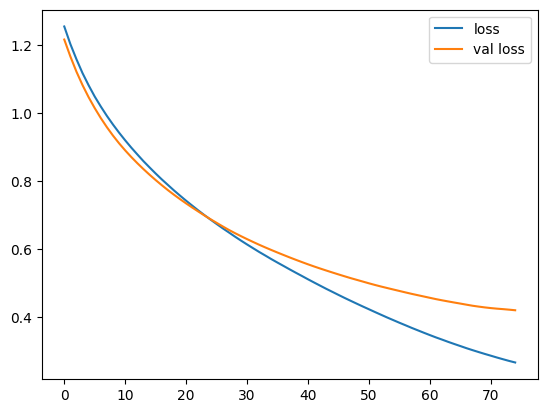

In [149]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend();

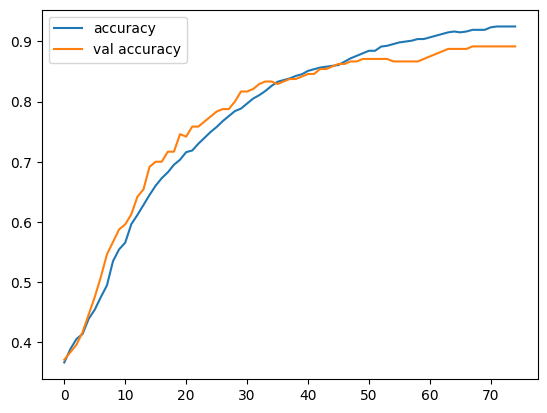

In [163]:
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['val_acc'], label = 'val accuracy')
plt.legend();

In [180]:
model.evaluate(X_test, y_test)[1]

8/8 [==============================] - 0s 3ms/step - loss: 0.3973 - acc: 0.9000


0.8999999761581421

In [189]:
nn_predictions = pd.DataFrame(model.predict(X_test), columns = ['MonkeyMoon', 'Oski', 'Vatira'])

8/8 [==============================] - 0s 2ms/step


In [190]:
nn_predictions

,MonkeyMoon,Oski,Vatira
0,0.001405,0.996661,0.001933
1,0.482572,0.071105,0.446322
2,0.984848,0.001690,0.013462
3,0.850370,0.091230,0.058399
4,0.607809,0.048042,0.344150
...,...,...,...
235,0.985235,0.000665,0.014100
236,0.711619,0.028407,0.259974
237,0.013901,0.036603,0.949496
238,0.100289,0.805717,0.093994


In [191]:
probabilities

,MonkeyMoon,Oski,Vatira
0,0.018912,0.902972,0.078116
1,0.240909,0.119975,0.639116
2,0.841178,0.044658,0.114164
3,0.694239,0.125261,0.180501
4,0.522335,0.131602,0.346062
...,...,...,...
235,0.801327,0.069581,0.129092
236,0.847363,0.023000,0.129636
237,0.121875,0.248680,0.629445
238,0.070484,0.720795,0.208721


In [192]:
import os
import pickle

In [193]:
with open('nn_model.pkl', 'wb') as picklefile:
    pickle.dump(model, picklefile)

In [194]:
model.save('tf_save_model')

INFO:tensorflow:Assets written to: tf_save_model/assets


INFO:tensorflow:Assets written to: tf_save_model/assets


In [195]:
with open('et_model.pkl', 'wb') as picklefile:
    pickle.dump(gs_et.best_estimator_, picklefile)